In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
placement_dataset = pd.read_csv('Placement.csv')
placement_dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
placement_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [4]:
placement_dataset.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [5]:
placement_dataset.duplicated().sum()

0

In [6]:
placement_dataset.isna().sum()

cgpa       0
package    0
dtype: int64

In [7]:
X = placement_dataset.iloc[:,:-1].values
y = placement_dataset.iloc[:,1].values

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred = linear_model.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [11]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [12]:
# Printing the calculated metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.29
Mean Squared Error (MSE): 0.12
Root Mean Squared Error (RMSE): 0.35
R-squared Score (R²): 0.78


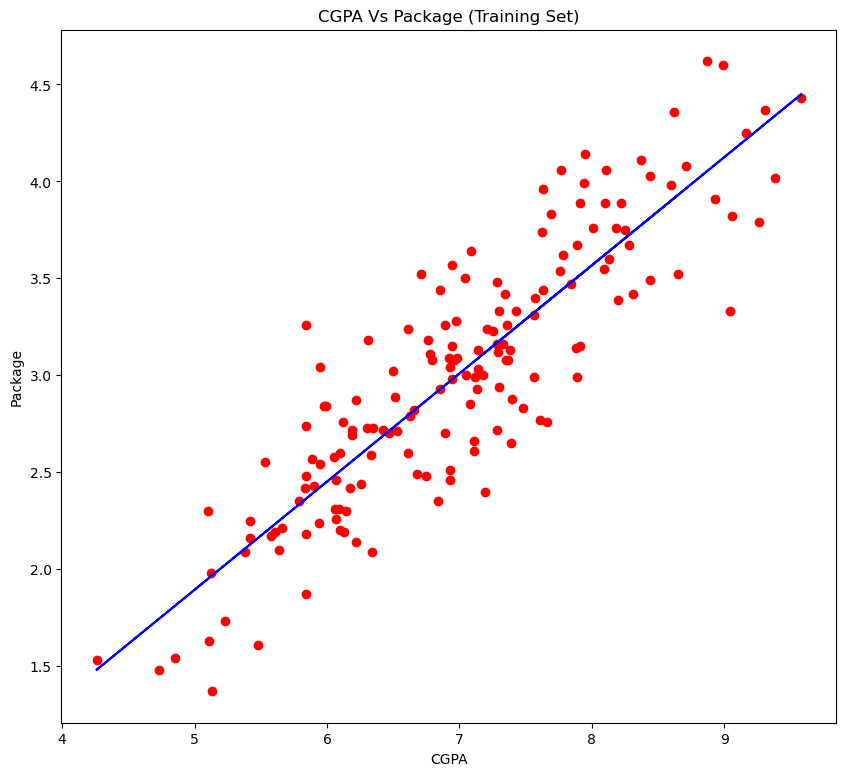

In [13]:
plt.figure(figsize=(10,9))
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,linear_model.predict(X_train),color='blue')
plt.title('CGPA Vs Package (Training Set)')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

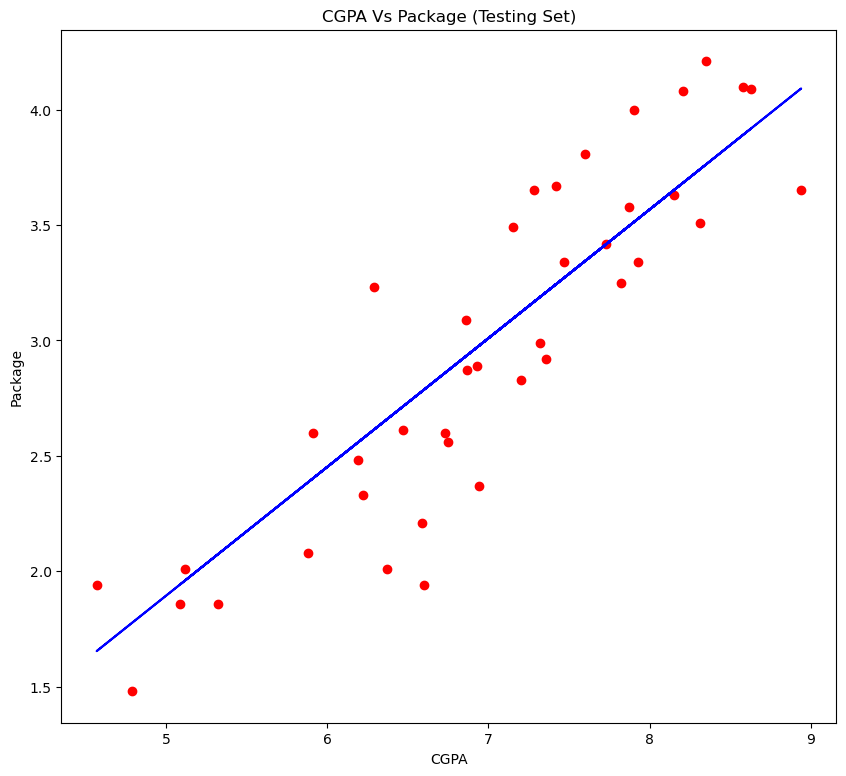

In [14]:
plt.figure(figsize=(10,9))
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,linear_model.predict(X_test),color='blue')
plt.title('CGPA Vs Package (Testing Set)')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [15]:
predict = linear_model.predict([[7.5]])
predict

array([3.28852788])

In [16]:
# Displaying coefficients
print("Coefficients(M): ", linear_model.coef_)
print("Intercept (C): ", linear_model.intercept_)

Coefficients(M):  [0.55795197]
Intercept (C):  -0.8961119222429144
